In [42]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
import numpy as np
import pylab as plt
import glob
import os
import shutil
from pprint import pprint

In [44]:
import stephane.display.graphes as graphes
import stephane.tools.Smath as smath
import icewave.gps.gps as gps
import icewave.gps.garmin as garmin

In [98]:
date = '2024_0302'
year,day = date.split('_')

base = '/Volumes/Share-8/'
folder = base+f"Data/{day}/GPS/"
filelist = glob.glob(folder+'*')

savefolder = folder#base + datesave + '/GPS/' 

pprint(filelist)

['/Volumes/Share-8/Data/0302/GPS/0000_2024-03-02 13_51_33.fit',
 '/Volumes/Share-8/Data/0302/GPS/0001_2024-03-02 14_30_11.fit',
 '/Volumes/Share-8/Data/0302/GPS/0002_2024-03-02 17_45_20.fit',
 '/Volumes/Share-8/Data/0302/GPS/1000_Waypoints_2024-03-02.gpx',
 '/Volumes/Share-8/Data/0302/GPS/Map_Table.txt',
 '/Volumes/Share-8/Data/0302/GPS/Carte_Setup_1_0302labeled.pdf',
 '/Volumes/Share-8/Data/0302/GPS/Carte_Setup_Etoile_0302labeled.pdf',
 '/Volumes/Share-8/Data/0302/GPS/0002_2024-03-02_17_45_20_Rimouski-Neigette_Canada.pdf',
 '/Volumes/Share-8/Data/0302/GPS/0002_2024-03-02_17_45_20_Rimouski-Neigette_Canada.pkl']


In [64]:
import datetime
waypoint = gpx.waypoints[1]
waypoint.time

datetime.datetime(2024, 3, 2, 19, 57, 28, tzinfo=SimpleTZ("Z"))

In [88]:
import datetime

waypoint = gpx.waypoints[0]

t = garmin.get_time(waypoint)
print(t)

19:30:02


Please install garmin package

/Volumes/
0002_2024-03-02 17_45_20
Parc national du Bic, Rimouski, Rimouski-Neigette, Bas-Saint-Laurent, Québec, Canada
Rimouski-Neigette, Canada
[-68.80755665246397, -68.80397003609687, 48.34567818325013, 48.34926479961723]
toto
Extent((0.3088678981876001,0.34616207887912864)->(0.308877861010842,0.3461720417023706) projected as normal)
figure already exists


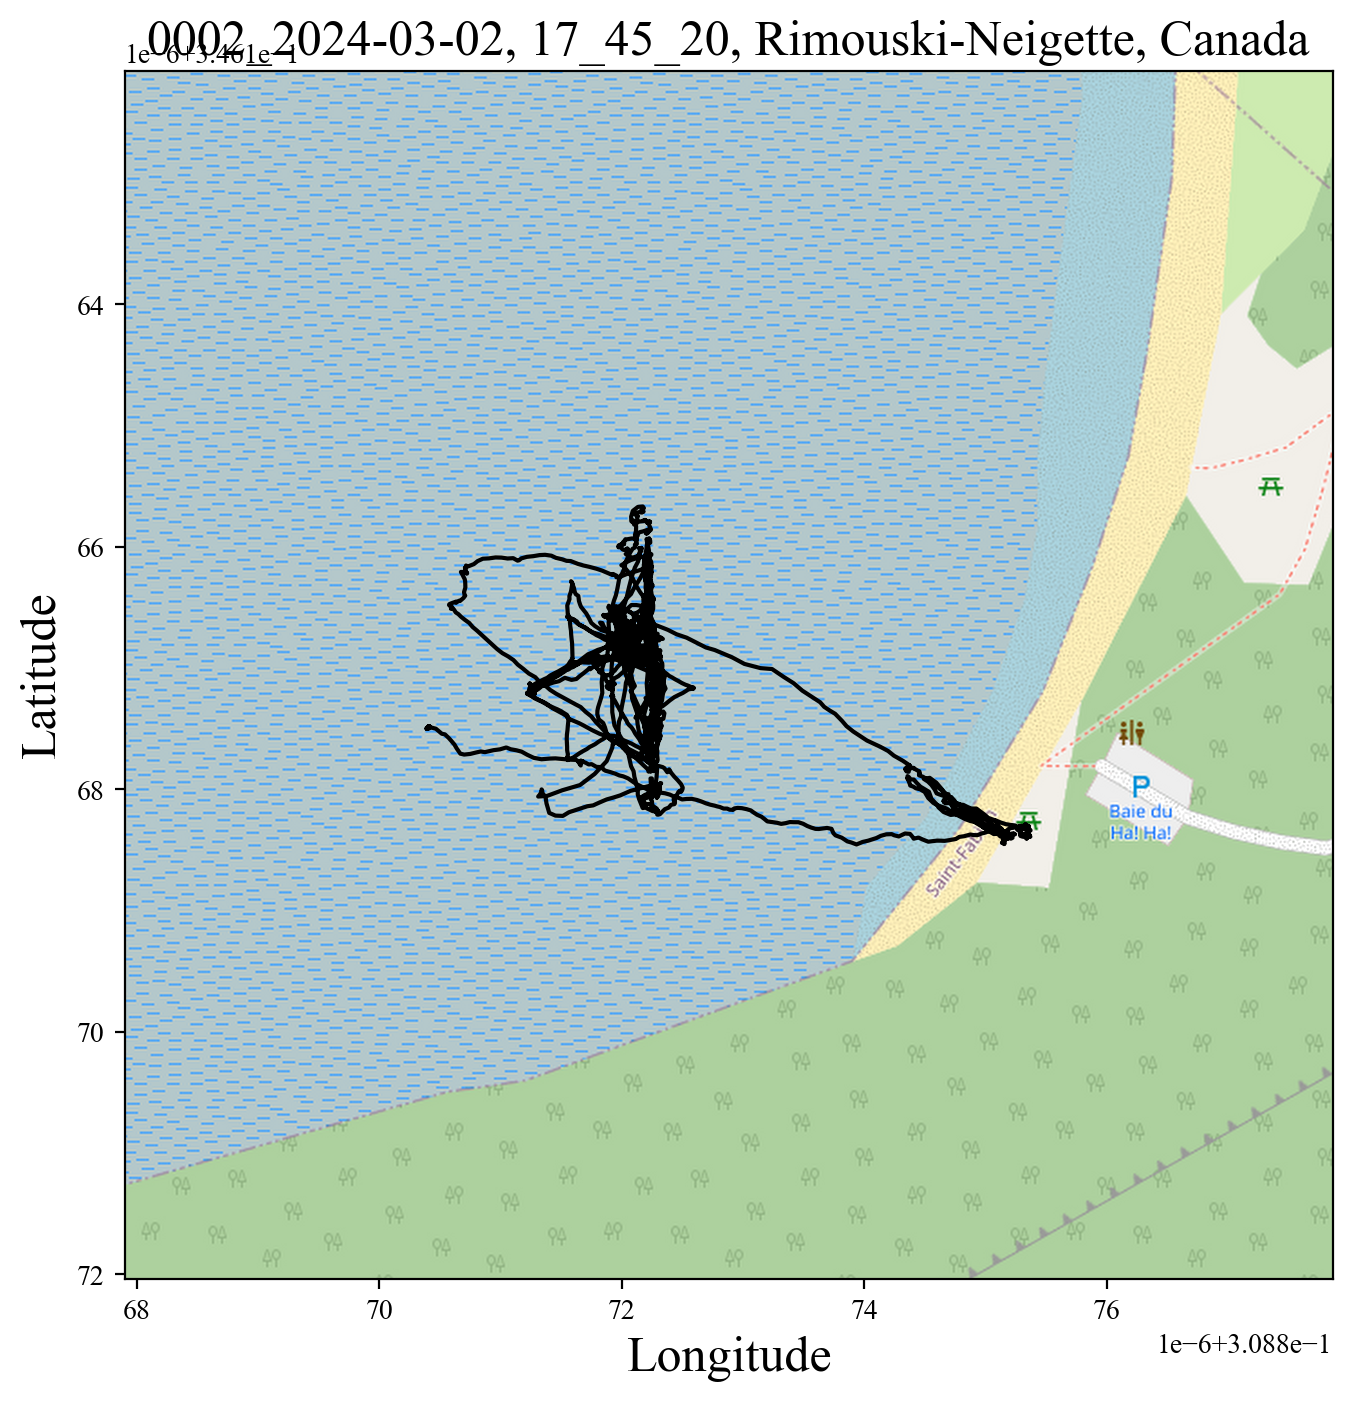

In [90]:
filefit = filelist[2] 

t1 = garmin.get_time(gpx.waypoints[1])
t2 = garmin.get_time(gpx.waypoints[-2])

X,Y,d = garmin.get_traj(filefit,tmin=t1,tmax=t2)#,tmin=gpx.waypoints[0].time(),tmax=gpx.waypoints[-1].time())
gps.display_traj(filefit,X,Y)
#plt.plot(X,Y)

In [67]:
d['r']

 ...]

In [ ]:
"Sat Mar  2 19:30:02 2024"


In [12]:
#date = '2024_0302'
#year,day = date.split('_')
#folder = base+day+'/GPS/'
norme_folder = base + 'Nomenclature/'

print(folder)
print(glob.glob(folder+'*'))
filelist = glob.glob(folder+'*.gpx')
print(filelist)
filegpx = filelist[0]

#base = '/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/'
#date = '2024_0211'
datesave=date.replace('_','/')
savefolder = folder#base + datesave + '/GPS/' 
print(savefolder)
import gpxpy
gpx_file = open(filegpx, 'r')
gpx = gpxpy.parse(gpx_file)

for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            print('Point at ({0},{1}) -> {2}'.format(point.latitude, point.longitude, point.elevation))

for waypoint in gpx.waypoints:
    print('waypoint {0}, {1} -> ({2},{3}), {4}'.format(waypoint.name, waypoint.time.ctime(), waypoint.latitude, waypoint.longitude,waypoint.description))

/Volumes/Share-7/Data/0302/GPS/
['/Volumes/Share-7/Data/0302/GPS/0000_2024-03-02 13_51_33.fit', '/Volumes/Share-7/Data/0302/GPS/0001_2024-03-02 14_30_11.fit', '/Volumes/Share-7/Data/0302/GPS/0002_2024-03-02 17_45_20.fit', '/Volumes/Share-7/Data/0302/GPS/1000_Waypoints_2024-03-02.gpx', '/Volumes/Share-7/Data/0302/GPS/Map_Table.txt']
['/Volumes/Share-7/Data/0302/GPS/1000_Waypoints_2024-03-02.gpx']
/Volumes/Share-7/Data/0302/GPS/
waypoint Sag240360, Sat Mar  2 19:30:02 2024 -> (48.348612,-68.799541), None
waypoint Sag240361, Sat Mar  2 19:57:28 2024 -> (48.347366,-68.806652), None
waypoint Sag240362, Sat Mar  2 20:22:44 2024 -> (48.347591,-68.806086), None
waypoint Sag240363, Sat Mar  2 20:26:52 2024 -> (48.347285,-68.805986), None
waypoint Sag240364, Sat Mar  2 20:29:51 2024 -> (48.347692,-68.806), None
waypoint Sag240365, Sat Mar  2 20:49:57 2024 -> (48.3473,-68.805982), None
waypoint Sag240366, Sat Mar  2 20:50:14 2024 -> (48.347329,-68.805976), None
waypoint Sag240367, Sat Mar  2 20:5

In [13]:
gpx.waypoints[0].description = "why not"
print(waypoint.description)

None


In [14]:
import icewave.geometry.tables as tables

norme_folder = '/Users/stephane/Documents/git/Data_local/Nomenclature/'
norme = tables.read_norme(norme_folder)
print(norme)

{'depart': 'g*', 'fin': 'g*', 'G': 'g^', 'B': 'mo', 'T': 'rs', 'D': 'kp', 'H': 'bv', 'S': 'bo', 'Tomo': 'g>', 'Quin': 'gv', 'borne': 'ks', 'plot': 'rp', 'R': 'bs', 'Canot': 'yo', 'Frac': 'kx'}


/Users/stephane/Documents/git/icewave/icewave/geometry/tables.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  table = np.asarray([line.split('\t') for line in lines])


In [17]:
global norme

print(norme_folder)
print(glob.glob(norme_folder+'*.txt'))
table = tables.read_table(folder)
print(folder)

/Users/stephane/Documents/git/Data_local/Nomenclature/
['/Users/stephane/Documents/git/Data_local/Nomenclature/Nomenclature_GPS.txt', '/Users/stephane/Documents/git/Data_local/Nomenclature/Nomenclature_Name_UQAR.txt']
/Volumes/Share-7/Data/0302/GPS/


In [28]:
pprint(table)
#print(norme)

[[288, 'depart']]


In [18]:
savefolder

'/Volumes/Share-7/Data/0302/GPS/'

Extent((0.3088700305555556,0.34616561140548185)->(0.30887269444444443,0.34616827529437066) projected as normal)


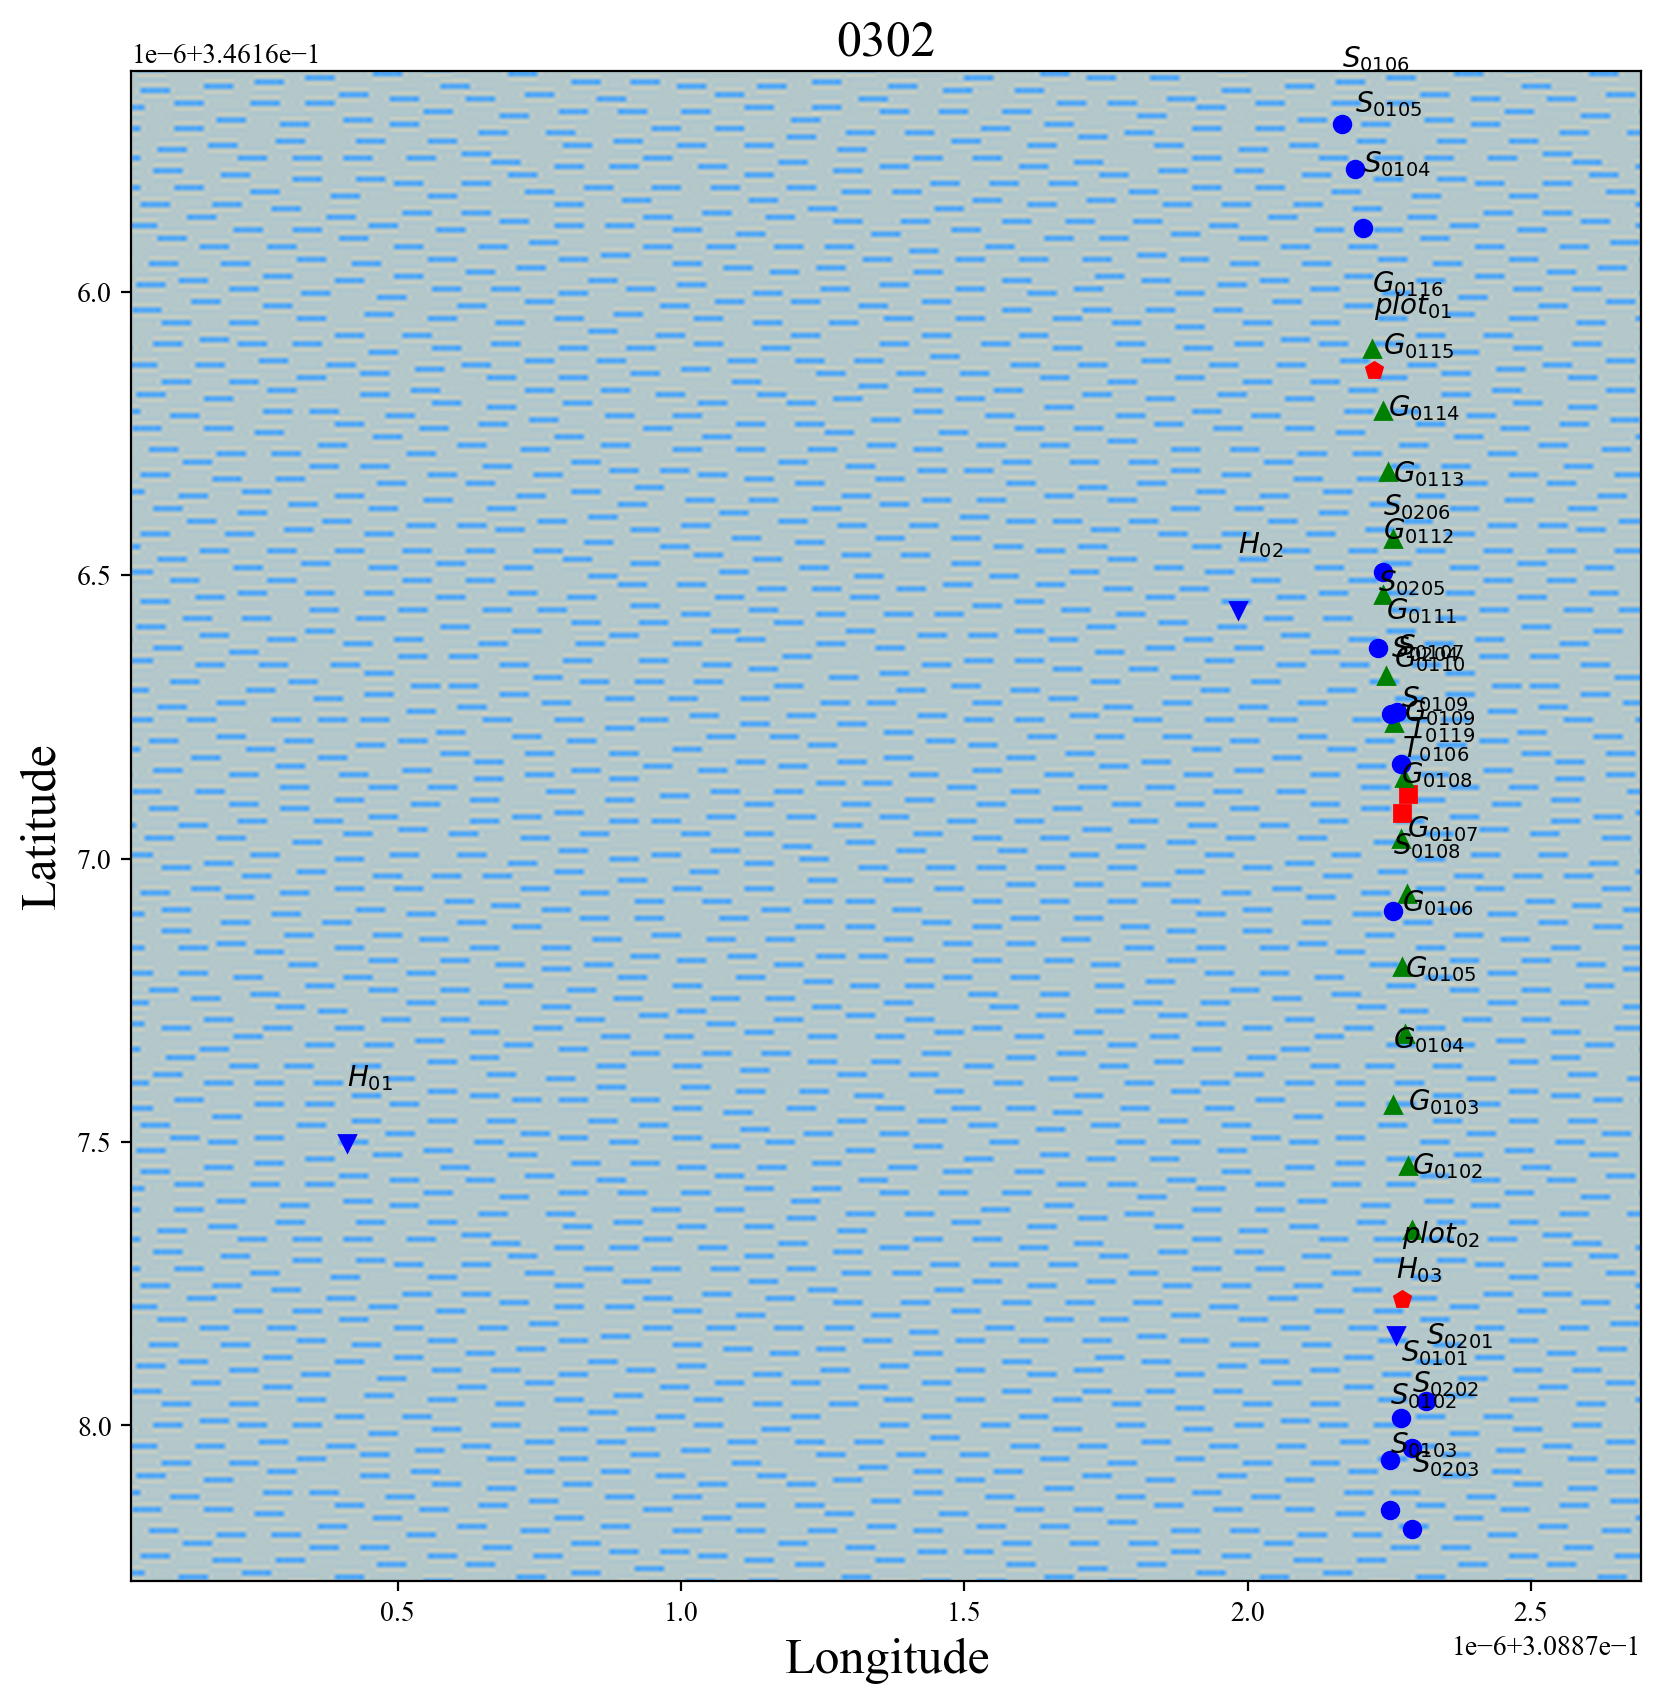

In [39]:
table = tables.read_table(folder)
ax,figs = tables.represent_waypoints(gpx,361,397,table=table,date='0302')
#print(savefolder)
graphes.save_figs(figs,savedir=savefolder,prefix='Carte_Setup_1_',suffix='labeled',frmt='pdf',overwrite=True)

In [ ]:
table = tables.read_table(folder)
ax,figs = tables.represent_waypoints(gpx,361,397,table=table,date='0302')
#print(savefolder)
graphes.save_figs(figs,savedir=savefolder,prefix='Carte_Setup_2_',suffix='labeled',frmt='pdf',overwrite=True)

0002_2024-03-02 17_45_20
Parc national du Bic, Rimouski, Rimouski-Neigette, Bas-Saint-Laurent, Québec, Canada
Rimouski-Neigette, Canada
[-68.80660865921527, -68.8056197622791, 48.34694875404239, 48.347937650978565]
toto
Extent((0.3088705315021798,0.3461658051795964)->(0.30887327843811363,0.3461685521155302) projected as normal)
figure already exists
Extent((0.30887094666666665,0.3461662310462475)->(0.3088728561111111,0.34616814049069194) projected as normal)


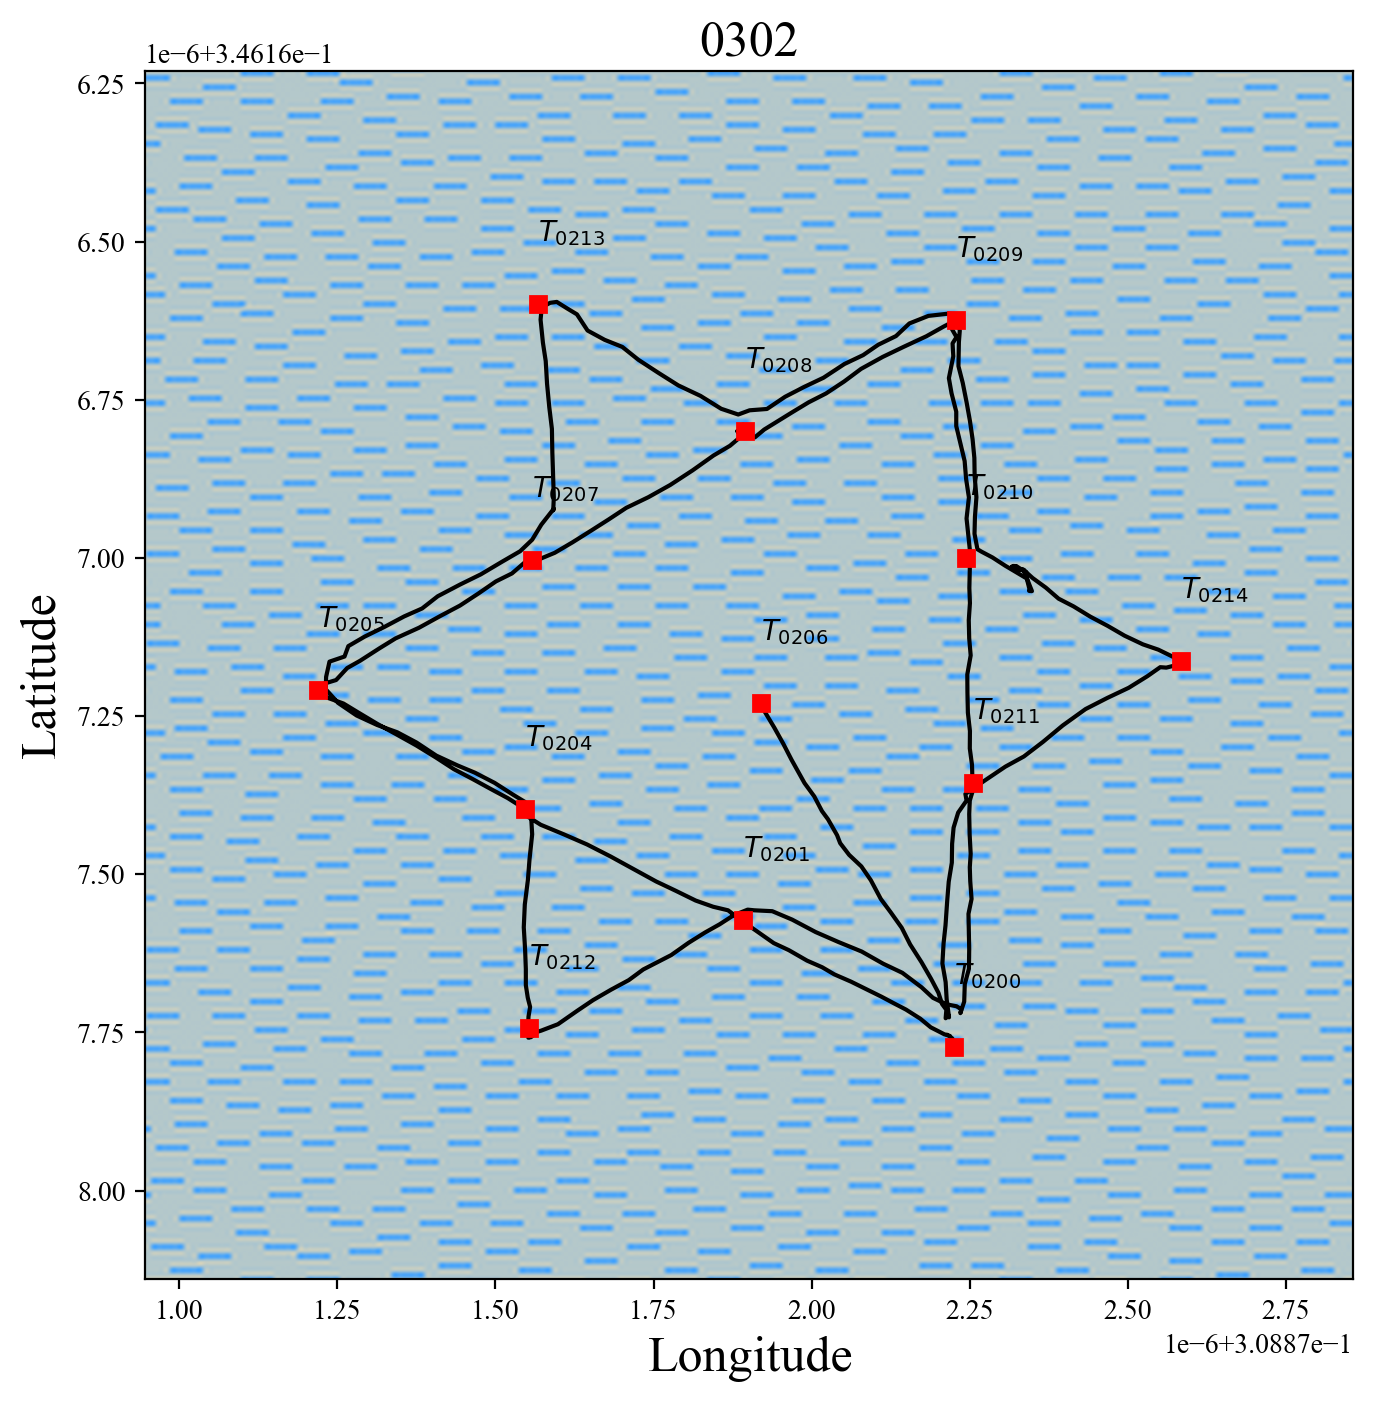

In [99]:

filefit = filelist[2] 
t1 = garmin.get_time(gpx.waypoints[40])
t2 = garmin.get_time(gpx.waypoints[52])

X,Y,d = garmin.get_traj(filefit,tmin=t1,tmax=t2)#,tmin=gpx.waypoints[0].time(),tmax=gpx.waypoints[-1].time())
#ax.plot(X,Y,'k')
ax,figs = gps.display_traj(filefit,X,Y)

table = tables.read_table(folder)
ax,figs = tables.represent_waypoints(gpx,400,412,table=table,date='0302',ax=ax)
#print(savefolder)

#plt.plot(X,Y)

graphes.save_figs(figs,savedir=savefolder,prefix='Carte_Setup_Etoile_',suffix='labeled',frmt='pdf',overwrite=True)


TypeError: represent_waypoints() got multiple values for argument 'table'

In [261]:
gpx.waypoints[0]

GPXWaypoint(48.365506, -70.697383, elevation=1.292548, time=datetime.datetime(2024, 2, 10, 12, 21, 46, tzinfo=SimpleTZ("Z")), name='Sag240063', symbol='Flag, Blue')

In [219]:
import icewave.geometry.display as display

#print(table)
norme = display.read_norme()
print(norme)

{'depart': {'name': 'depart', 'label': 'g*', 'size': '20', 'detail': 'depart'}, 'fin': {'name': 'fin', 'label': 'g*', 'size': '20', 'detail': 'fin'}, 'G': {'name': 'G', 'label': 'g>', 'size': '10', 'detail': 'Geophone'}, 'B': {'name': 'B', 'label': 'mo', 'size': '12', 'detail': 'Buoy'}, 'T': {'name': 'T', 'label': 'rs', 'size': '10', 'detail': 'Telephone'}, 'D': {'name': 'D', 'label': 'kp', 'size': '16', 'detail': 'Drone'}, 'H': {'name': 'H', 'label': 'bv', 'size': '10', 'detail': 'Hauteur'}, 'S': {'name': 'S', 'label': 'bo', 'size': '12', 'detail': 'Source'}, 'Tomo': {'name': 'Tomo', 'label': 'g>', 'size': '10', 'detail': 'Tomographie'}, 'borne': {'name': 'borne', 'label': 'ks', 'size': '20', 'detail': 'borne'}, 'plot': {'name': 'plot', 'label': 'rp', 'size': '20', 'detail': 'plot'}, 'R': {'name': 'R', 'label': 'bs', 'size': '24', 'detail': 'ROV'}, 'Canot': {'name': 'Canot', 'label': 'yo', 'size': '30', 'detail': 'Canot'}}


[[239, 'plot_01'],
 [239, 'G_101'],
 [240, 'plot_02'],
 [240, 'G_116'],
 [241, 'H_01'],
 [242, 'S_0104'],
 [243, 'S_0105'],
 [244, 'S_0106'],
 [245, 'B_0101'],
 [246, 'B_0102'],
 [247, 'B_0103'],
 [248, 'S_0101'],
 [249, 'S_0102'],
 [250, 'S_0103'],
 [251, 'T_0119'],
 [252, 'T_0118'],
 [253, 'T_0117'],
 [254, 'T_0116'],
 [255, 'T_0113'],
 [256, 'T_0111'],
 [257, 'T_0109'],
 [258, 'T_0106'],
 [259, 'H_02'],
 [260, 'B_0105'],
 [260, 'T_0104'],
 [261, 'T_0100'],
 [262, 'S_0206'],
 [263, 'G_0204'],
 [264, 'G_0213'],
 [265, 'H_03'],
 [266, 'G_0212'],
 [267, 'G_0215'],
 [268, 'G_0216'],
 [269, 'G_0214'],
 [264, 'G_0211'],
 [270, 'G_0213'],
 [271, 'G_0206'],
 [272, 'G_0208'],
 [273, 'G_0210'],
 [274, 'G_0209'],
 [275, 'G_0206'],
 [276, 'G_0202'],
 [277, 'G_0203'],
 [278, 'G_0207'],
 [279, 'G_0204'],
 [280, 'fin']]

In [261]:
waypoint

-68.850653

In [372]:
import icewave.geometry.compare as comp
comp.load()

/Users/stephane/Documents/git/Data_local/0223/GPS/map_table.txt
['#' 'G_0101' 'G_0102' 'G_0103' 'G_0104' 'G_0105' 'G_0106' 'G_0107'
 'G_0108' 'G_0109' 'G_0110' 'G_0111' 'G_0112' 'G_0113' 'G_0114' 'G_0115'
 'G_0116' 'S_0101' 'S_0102' 'S_0103' 'S_0104' 'S_0105' 'S_0106' 'S_0107'
 'S_0108' 'S_0109' 'S_0110' 'S_0111' 'S_0112' 'T_0119' 'T_0118' 'T_0117'
 'T_0116' 'T_0113' 'T_0111' 'T_0109' 'T_0106' 'T_0104' 'T_0100' 'B_0101'
 'B_0102' 'B_0103' 'B_0105' 'G_0201' 'G_0205' 'G_0208' 'G_0210' 'G_0202'
 'G_0206' 'G_0209' 'G_0211' 'G_0213' 'G_0216' 'G_0203' 'G_0207' 'G_0212'
 'G_0215' 'G_0204' 'G_0214']
239 ['plot_01', 'G_0101', 'G_0201']
239 [1] G_0101 [0, 0, 0]
20240223T172542
239 [43] G_0201 [0, 0, 0]
20240223T172542
240 ['plot_02', 'G_0116']
240 [16] G_0116 [45, 0, 0]
20240223T172809
241 ['H_01']
242 ['S_0104']
242 [20] S_0104 [50, 0, 0]
20240223T173008
243 ['S_0105']
243 [21] S_0105 [53, 0, 0]
20240223T173057
244 ['S_0106']
244 [22] S_0106 [56, 0, 0]
20240223T173204
245 ['B_0101']
245 [39] B_

In [362]:
import time
import datetime

T = waypoint.time.strftime("%Y%m%dT%H%M%S")
print(T)

20240223T213945


In [ ]:
print(np.min(np.asarray(notations)-[x,y+eps])


bo bo
bo bo
bo bo
bo bo
bo bo
bo bo
mo rs
mo rs
g> g>
g> g>
g> g>
g> g>


(-19.3, 163.3, -42.9, 42.9)

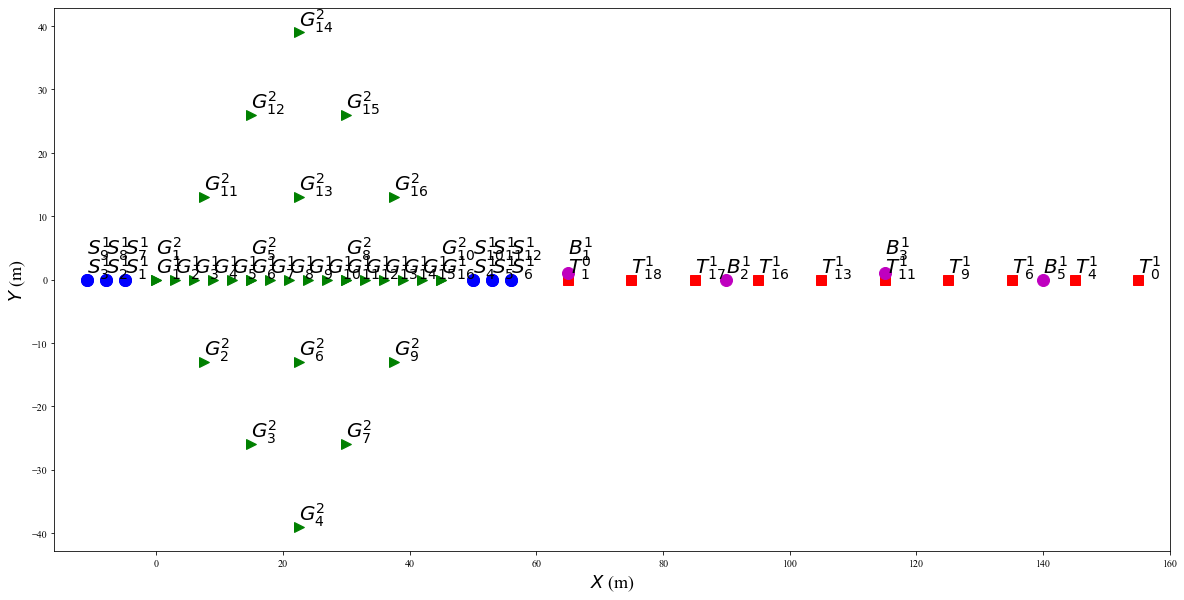

In [300]:
import icewave.geometry.experiment_2024_0223 as experiment


figs,geom = experiment.Sag24()
graphes.save_figs(figs,savedir=savefolder,prefix='geometry_'+date,suffix='_general',overwrite=True)
#print(figs)
plt.axis('equal')

#plt.axis([-15,70,-45,45])

In [371]:
import icewave.geometry.save as geom_save

filename = savefolder + f"Geom_table_{day}.txt"
#pprint(geom)

geom_save.save(geom,filename)

['#', 'X', 'Y', 'Z']
#	X	Y	Z
['#', 'X', 'Y', 'Z']
G_0101	0	0	0
['#', 'X', 'Y', 'Z']
G_0102	3	0	0
['#', 'X', 'Y', 'Z']
G_0103	6	0	0
['#', 'X', 'Y', 'Z']
G_0104	9	0	0
['#', 'X', 'Y', 'Z']
G_0105	12	0	0
['#', 'X', 'Y', 'Z']
G_0106	15	0	0
['#', 'X', 'Y', 'Z']
G_0107	18	0	0
['#', 'X', 'Y', 'Z']
G_0108	21	0	0
['#', 'X', 'Y', 'Z']
G_0109	24	0	0
['#', 'X', 'Y', 'Z']
G_0110	27	0	0
['#', 'X', 'Y', 'Z']
G_0111	30	0	0
['#', 'X', 'Y', 'Z']
G_0112	33	0	0
['#', 'X', 'Y', 'Z']
G_0113	36	0	0
['#', 'X', 'Y', 'Z']
G_0114	39	0	0
['#', 'X', 'Y', 'Z']
G_0115	42	0	0
['#', 'X', 'Y', 'Z']
G_0116	45	0	0
['#', 'X', 'Y', 'Z']
S_0101	-5	0	0
['#', 'X', 'Y', 'Z']
S_0102	-8	0	0
['#', 'X', 'Y', 'Z']
S_0103	-11	0	0
['#', 'X', 'Y', 'Z']
S_0104	50	0	0
['#', 'X', 'Y', 'Z']
S_0105	53	0	0
['#', 'X', 'Y', 'Z']
S_0106	56	0	0
['#', 'X', 'Y', 'Z']
S_0107	-5	0	0
['#', 'X', 'Y', 'Z']
S_0108	-8	0	0
['#', 'X', 'Y', 'Z']
S_0109	-11	0	0
['#', 'X', 'Y', 'Z']
S_0110	50	0	0
['#', 'X', 'Y', 'Z']
S_0111	53	0	0
['#', 'X', 'Y', 'Z']
S_0112	

In [185]:
n = 50
notes=[]
eps = 1
c=1
for i in range(1,n):
    tag = geom[i][0]
    x = geom[i][1]
    y = geom[i][2]
    #print(x,y)
    
    notes.append([x,y+eps])
    if i>1:
        d = np.linalg.norm(np.asarray(notes[:-1])-np.asarray([x,y+eps]),axis=1)
        if np.min(d)==0:
            c=c+1
        else:
            c=1
        print(np.min(d),c)

3.0 1
3.0 1
3.0 1
3.0 1
3.0 1
3.0 1
3.0 1
3.0 1
3.0 1
3.0 1
3.0 1
3.0 1
3.0 1
3.0 1
3.0 1
5.0 1
3.0 1
3.0 1
5.0 1
3.0 1
3.0 1
9.0 1
10.0 1
10.0 1
10.0 1
10.0 1
10.0 1
10.0 1
10.0 1
10.0 1
10.0 1
0.0 2
5.0 1
0.0 2
5.0 1
0.0 2
0.0 3
0.0 4
0.0 5
13.0862523283024 1
13.0862523283024 1
13.0862523283024 1
15.008331019803634 1
15.0 1
15.008331019803634 1
13.0862523283024 1
13.0862523283024 1
13.0862523283024 1


In [85]:
savefolder

'/Volumes/Share-3/Data/0223/GPS/'